# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Load the Data

In [2]:
# Load data from the Excel file
df = pd.read_excel('Online Retail.xlsx')

# Display the first few rows to get an overview of the data structure and content
print("Head of the dataset:")
print(df.head())

Head of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


## Task 2: Data cleaning - Handling missing values and removing unnecessary columns

In [3]:
# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
# For this analysis, remove rows where CustomerID is missing (important for customer-related analysis)
df_clean = df.dropna(subset=['CustomerID'])
# There are no redundant columns explicitly specified, so we will keep all remaining for now
# Remove rows where Quantity is less than or equal to zero (returns or errors) for meaningful sales analysis
df_clean = df_clean[df_clean['Quantity'] > 0]

## Task 3: Explore basic statistics

In [5]:
# Use describe() to get central tendency and dispersion measures for numeric columns
print("\nBasic statistics of cleaned ")
print(df_clean.describe())


Basic statistics of cleaned 
            Quantity      UnitPrice     CustomerID
count  397924.000000  397924.000000  397924.000000
mean       13.021823       3.116174   15294.315171
std       180.420210      22.096788    1713.169877
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000


## Task 4: Data visualization for insights

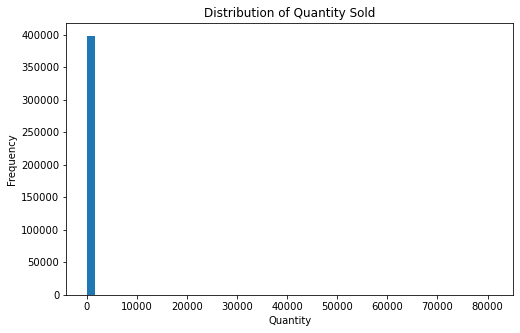

In [6]:
# Plot histogram of Quantity to understand distribution
plt.figure(figsize=(8, 5))
plt.hist(df_clean['Quantity'], bins=50)
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

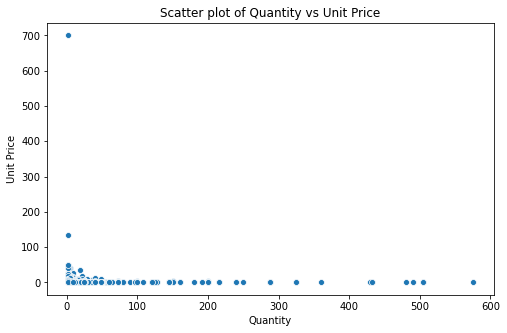

In [7]:
# Plot scatter plot of UnitPrice vs Quantity to see any correlation
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df_clean.sample(5000))  # Sample for faster plotting
plt.title('Scatter plot of Quantity vs Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

## Task 5: Analyze sales trends over time

In [8]:
# Convert InvoiceDate to datetime if not already
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
# Set InvoiceDate as DataFrame index (for time-series operations)
df_clean.set_index('InvoiceDate', inplace=True)

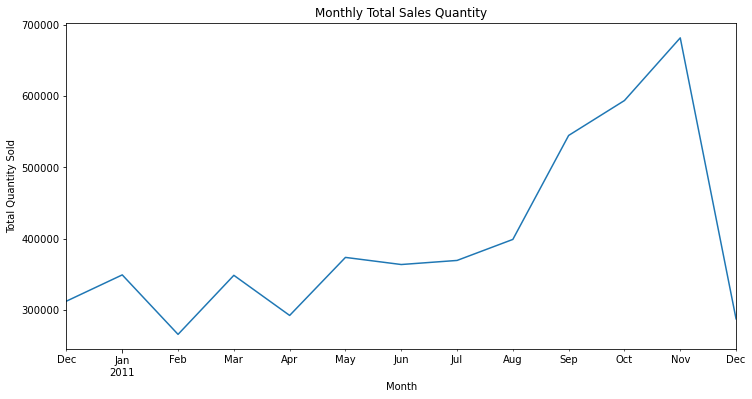

In [9]:
# Resample sales quantity by month to find busiest months
monthly_sales = df_clean['Quantity'].resample('M').sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Total Sales Quantity')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

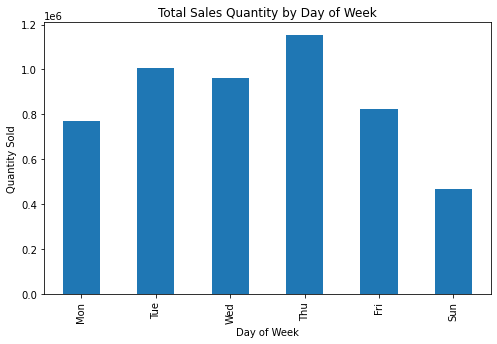

In [10]:
# Find busiest day of week in terms of sales quantity
# Extract day of week from index (0=Monday, 6=Sunday)
df_clean['DayOfWeek'] = df_clean.index.dayofweek
day_sales = df_clean.groupby('DayOfWeek')['Quantity'].sum()
days_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
day_sales.index = day_sales.index.map(days_map)
plt.figure(figsize=(8, 5))
day_sales.plot(kind='bar')
plt.title('Total Sales Quantity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Quantity Sold')
plt.show()

## Task 6: Explore top-selling products and countries

In [11]:
# Top 10 products by total quantity sold
top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Quantity Sold:")
print(top_products)


Top 10 Products by Quantity Sold:
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


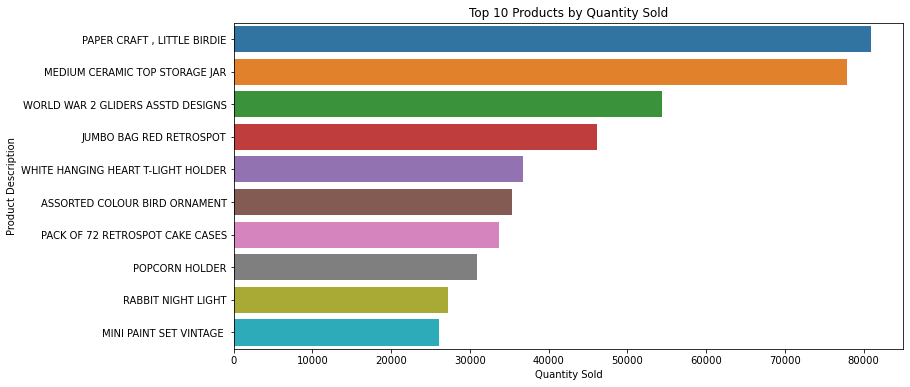

In [12]:
# Visualize top products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

In [13]:
# Top 10 countries by quantity sold
top_countries = df_clean.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Countries by Quantity Sold:")
print(top_countries)


Top 10 Countries by Quantity Sold:
Country
United Kingdom    4269472
Netherlands        200937
EIRE               140525
Germany            119263
France             111472
Australia           84209
Sweden              36083
Switzerland         30083
Spain               27951
Japan               26016
Name: Quantity, dtype: int64


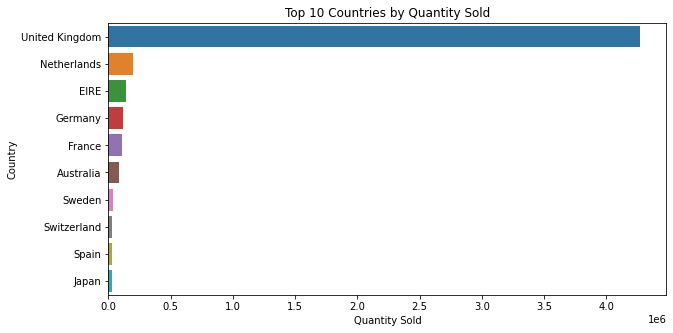

In [14]:
# Visualize top countries
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Country')
plt.show()

## Task 7: Identify outliers or anomalies

In [15]:
# Check for extreme values in Quantity and UnitPrice
print("\nOutlier detection:")
print("Quantity max:", df_clean['Quantity'].max())
print("Quantity min:", df_clean['Quantity'].min())
print("Unit Price max:", df_clean['UnitPrice'].max())
print("Unit Price min:", df_clean['UnitPrice'].min())


Outlier detection:
Quantity max: 80995
Quantity min: 1
Unit Price max: 8142.75
Unit Price min: 0.0


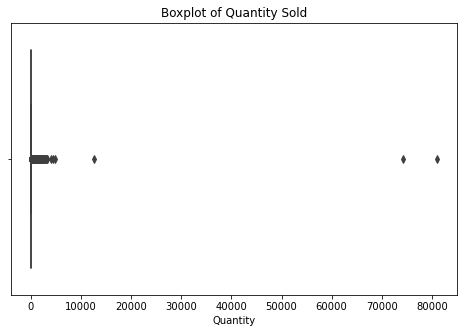

In [16]:
# Visualize boxplots to identify outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['Quantity'])
plt.title('Boxplot of Quantity Sold')
plt.show()

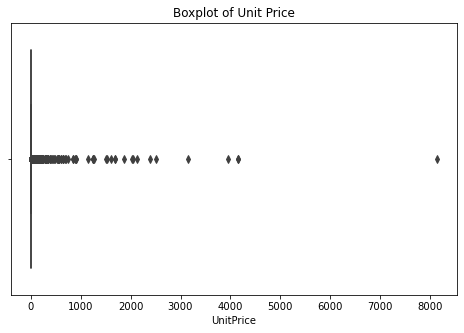

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['UnitPrice'])
plt.title('Boxplot of Unit Price')
plt.show()

# Discuss potential impact:
# Extreme values indicate potential data entry errors or special cases such as bulk orders.
# These outliers can skew summary statistics and should be considered carefully depending on analysis goals.

## Task 8: Draw conclusions and summarize findings

In [18]:
print("\nSummary of Findings:")
print(f"Total number of transactions (in cleaned data): {df_clean['InvoiceNo'].nunique()}")
print(f"Total number of customers: {df_clean['CustomerID'].nunique()}")
print(f"Top selling product: {top_products.index[0]} with {top_products.iloc[0]} units sold")
print(f"Top selling country: {top_countries.index[0]} with {top_countries.iloc[0]} units sold")
print(f"Month with highest sales quantity: {monthly_sales.idxmax().strftime('%B %Y')}")
print(f"Day with highest sales quantity: {day_sales.idxmax()}")


Summary of Findings:
Total number of transactions (in cleaned data): 18536
Total number of customers: 4339
Top selling product: PAPER CRAFT , LITTLE BIRDIE with 80995 units sold
Top selling country: United Kingdom with 4269472 units sold
Month with highest sales quantity: November 2011
Day with highest sales quantity: Thu
